**Installing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import pickle

**Importing the Dataset**

In [8]:
data = pd.read_csv(r'C:\Users\eisha\Documents\python\Wine Quality Prediction\Dataset\winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [13]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

**Data Visualization**

Univariate Analysis

C:\Users\eisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


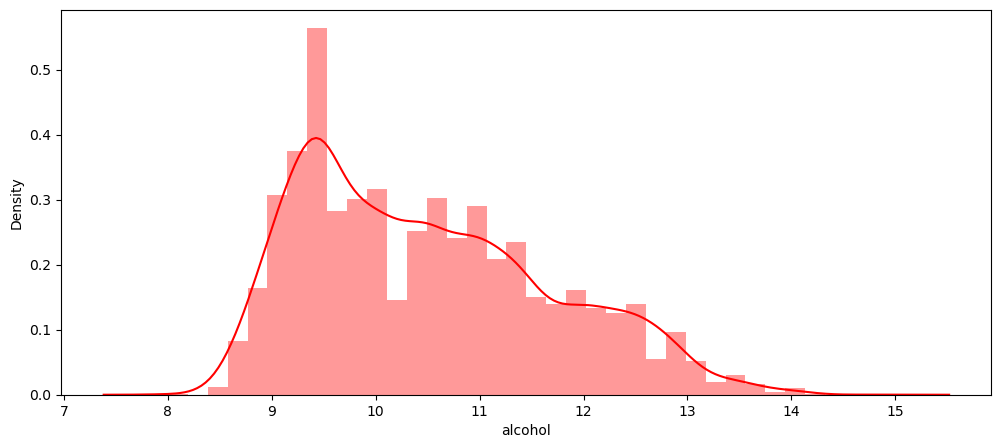

In [23]:
# Checking the distribution (normal or skewed)

plt.figure(figsize=(12,5))
sns.distplot(data['alcohol'],color='r')
plt.show()

In [15]:
df_cat = data.select_dtypes(include='object')
df_cat.head()

,type
0,white
1,white
2,white
3,white
4,white


C:\Users\eisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


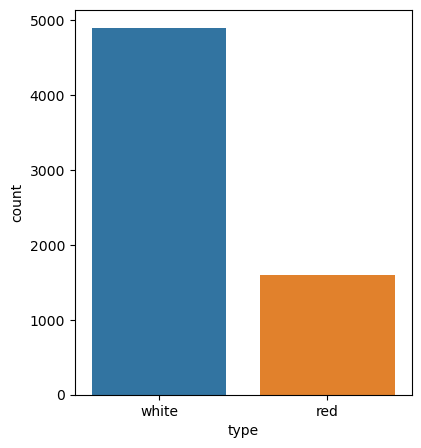

In [24]:
# Visualizing the count of categorical variable.

plt.figure(figsize=(20,5))
for i,j in enumerate(df_cat):
    plt.subplot(1,4,i+1)
    sns.countplot(data[j])   

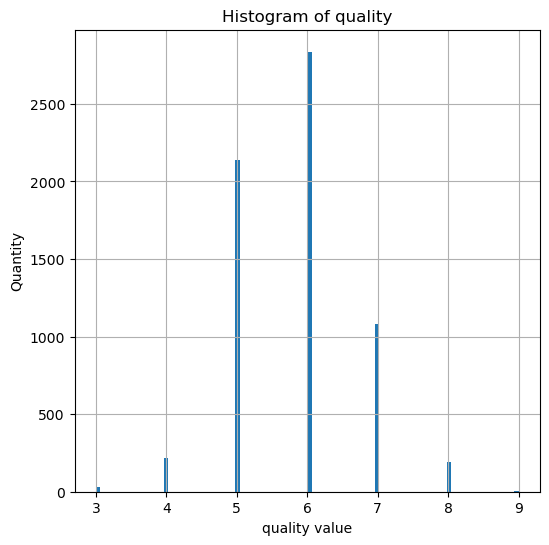

In [17]:
axarr = data.hist(column=['quality'], bins=100, figsize=(6, 6))
ax = axarr.flatten()[0]
ax.set_xlabel(f"{ax.get_title()} value")
ax.set_ylabel("Quantity")
title = ax.get_title()
ax.set_title(f"Histogram of {title}")
plt.show()

**Bivariate Analysis**

C:\Users\eisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


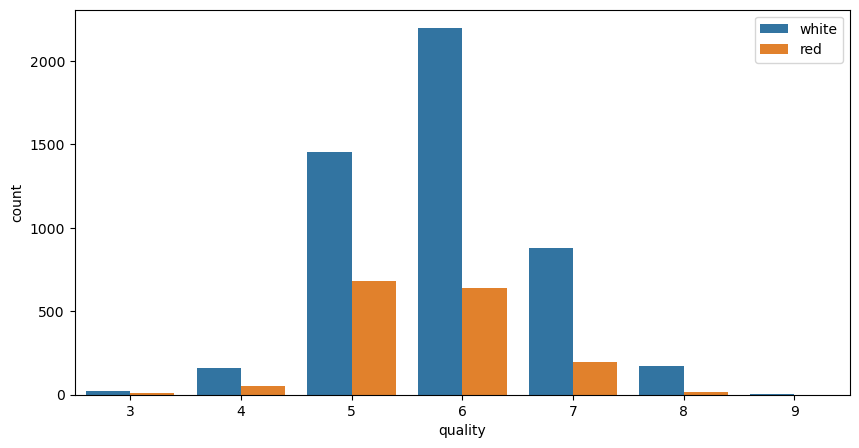

In [25]:
# Visualizing the relation between quality and type

plt.figure(figsize=(10,5))
sns.countplot(data['quality'],hue=data['type'])
plt.legend(loc='upper right')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


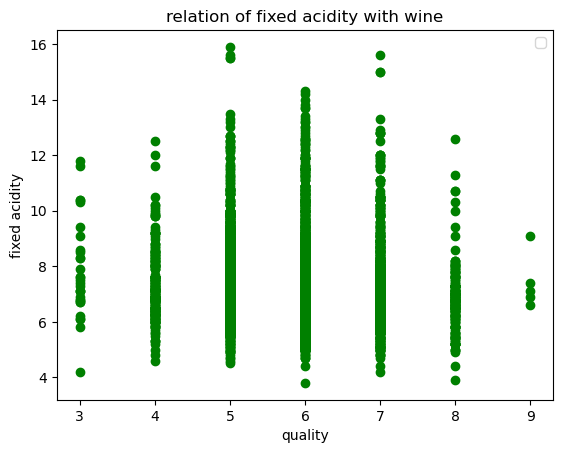

In [26]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(data['quality'], data['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


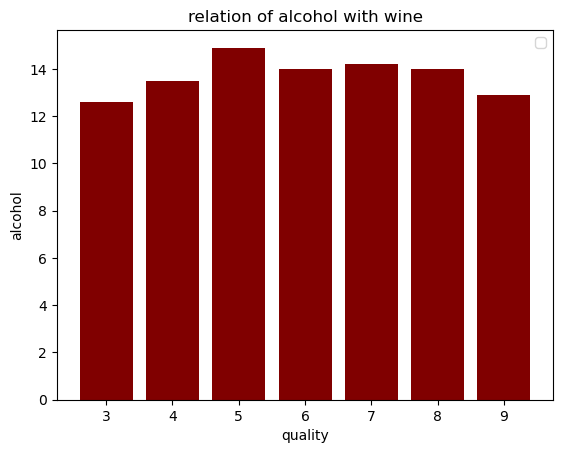

In [37]:
# checking the variation of fixed acidity in the different qualities of wine

plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

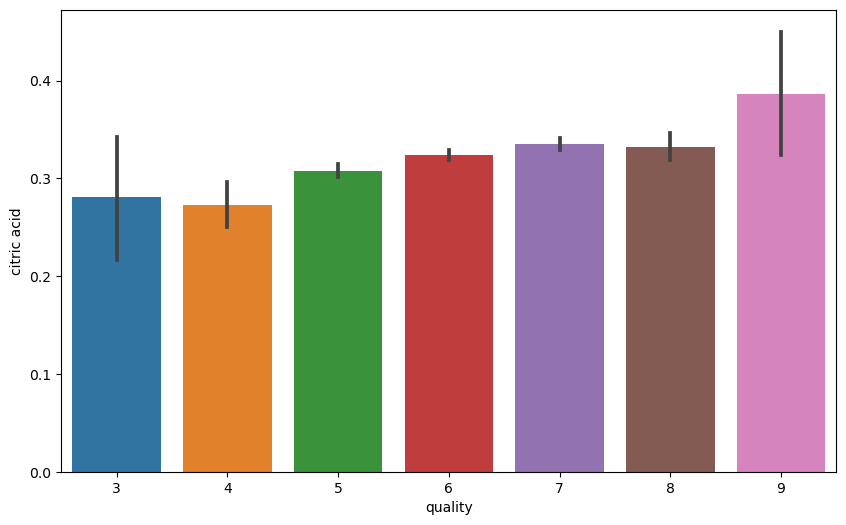

In [38]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)



<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

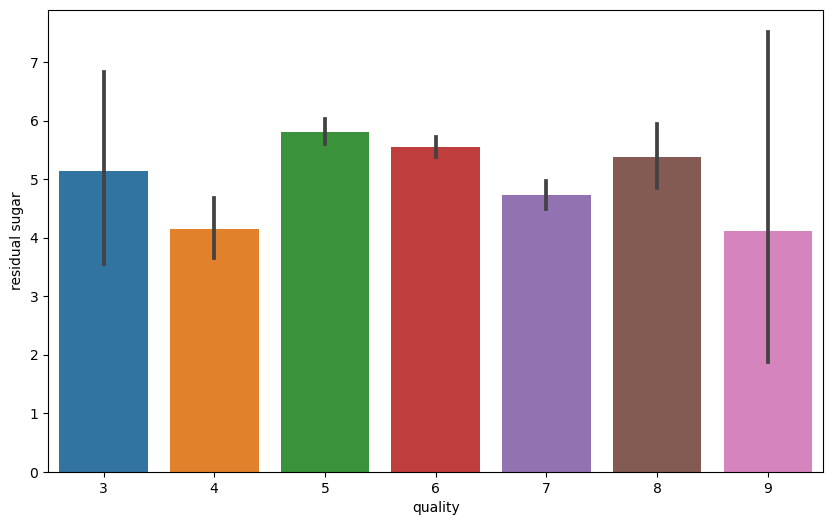

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

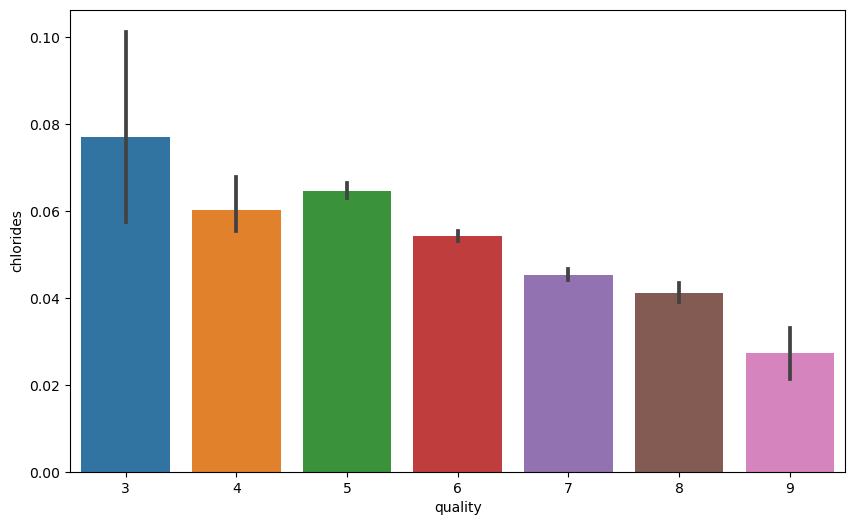

In [40]:
#Composition of chloride also go down as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

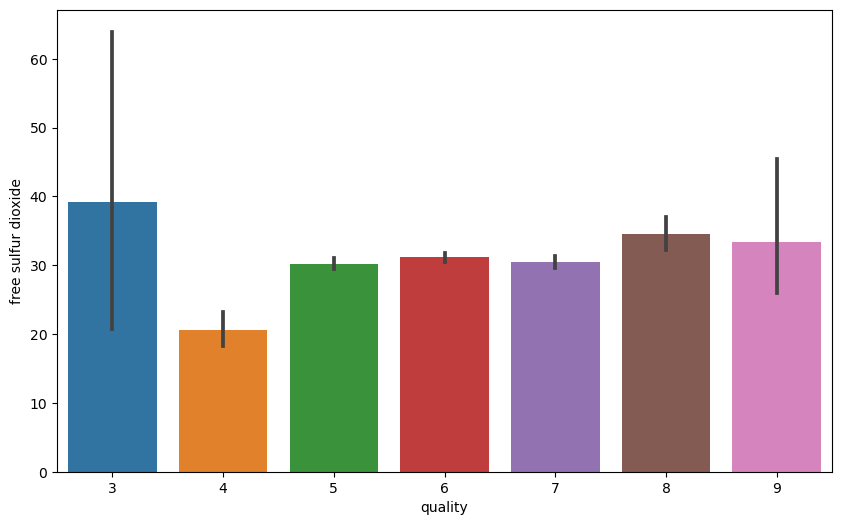

In [41]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)



<AxesSubplot:xlabel='quality', ylabel='sulphates'>

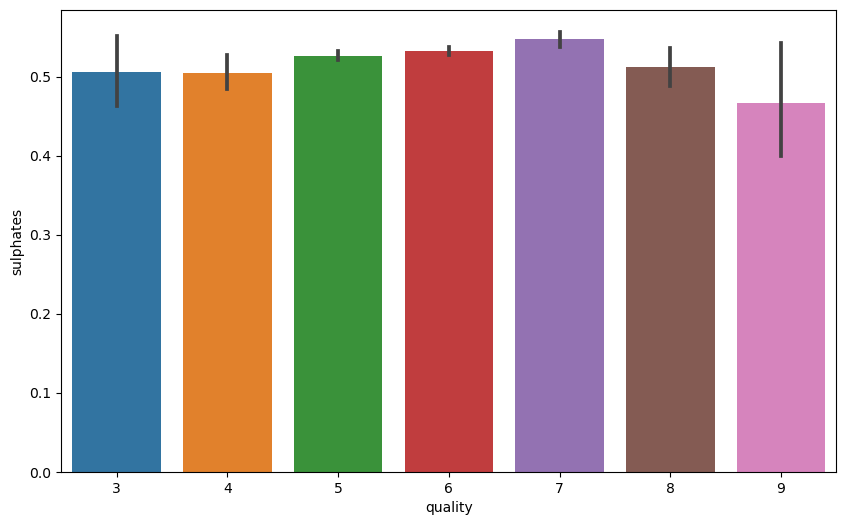

In [42]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

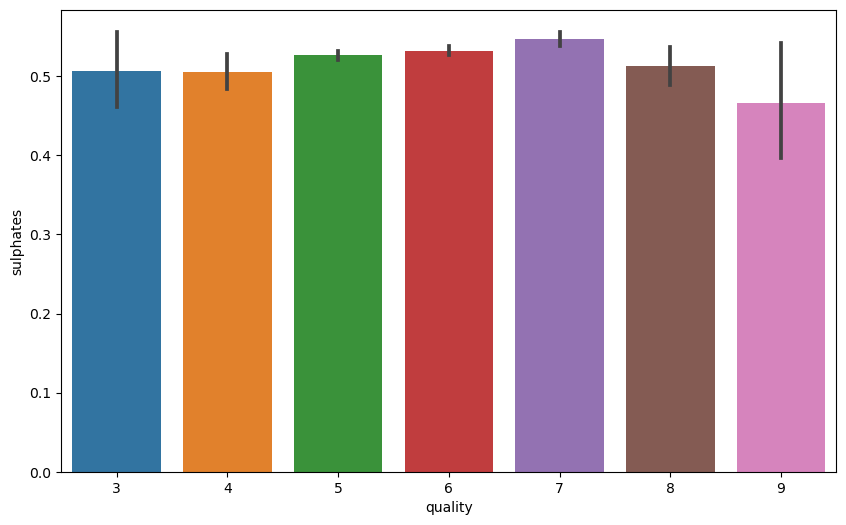

In [43]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

As we can see that like the above two items do not have very strong relation to the dependent variable we have to showcase a correlation plot to check which of the items are more related to the dependent variable and which items are less related to the dependent variables.

C:\Users\eisha\AppData\Local\Temp\ipykernel_7104\1055928178.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

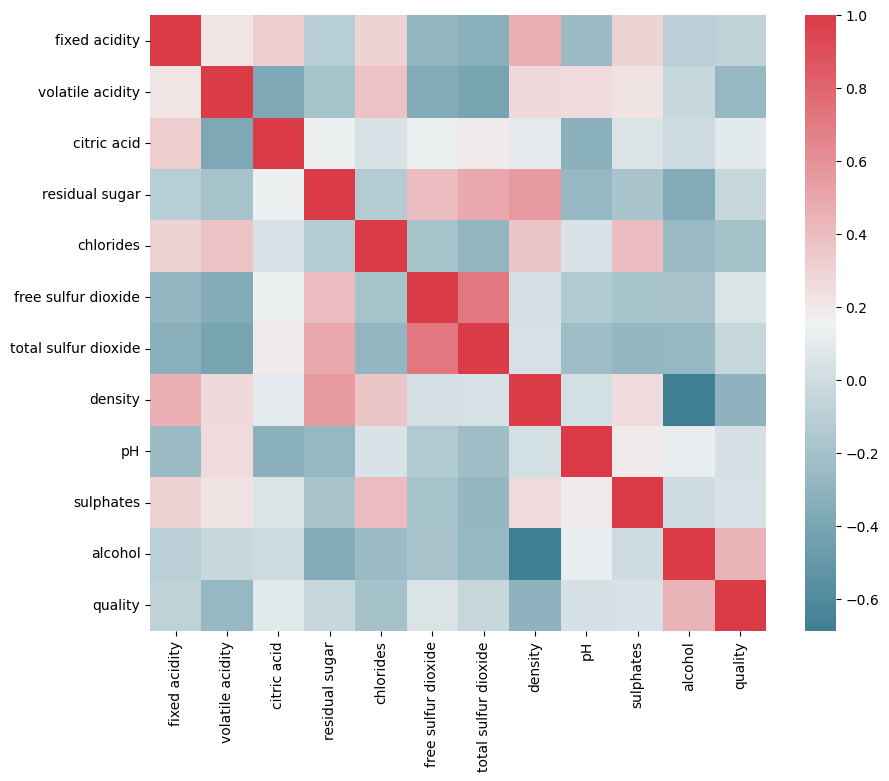

In [44]:

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

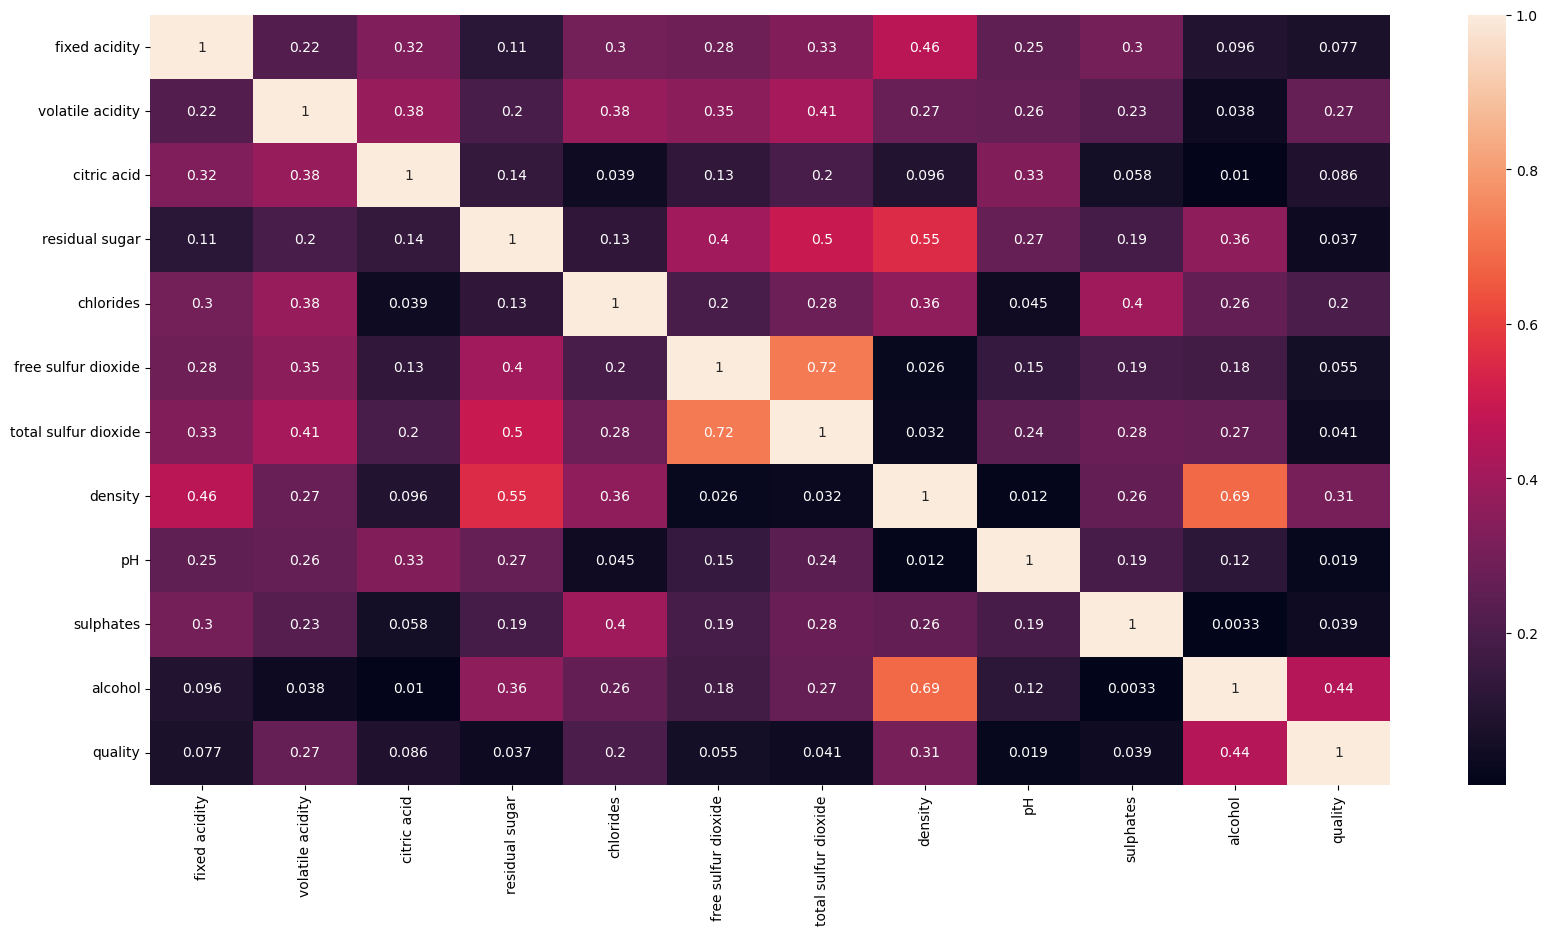

In [45]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr().abs(), annot = True)
plt.show()

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other.
For Example, 
# The strongly correlated items are :

1.fixed acidity and citric acid.
2.free sulphur dioxide and total sulphor dioxide.
3.fixed acidity and density.
4. alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

# The weekly correlated items are :

1.citric acid and volatile acidity.
2.fixed acidity and ph.
3.density and alcohol.

These are some relations which do not depend on each other at all.

In [46]:
#Descriptive Analysis
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Data pre-processing**

In [47]:
# Removing Unnecassary columns from the dataset
# As we saw that volatile acidity, total sulphor dioxide, chlorides, density are very less related to the dependent variable 
#   quality so even if we remove these columns the accuracy won't be affected that much.

data = data.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides', 'density'], axis = 1)

# checking the shape of the dataset
print(data.shape)

(6497, 9)


In [48]:
data.columns

Index(['type', 'fixed acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [49]:
# converting the response variables(3-7) as binary response variables that is either good or bad
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [50]:
# analyzing the different values present in the dependent variable(quality column)
data['quality'].value_counts()

good    4108
bad     2384
Name: quality, dtype: int64

In [51]:
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [52]:
data.isnull().any()

type                   False
fixed acidity           True
citric acid             True
residual sugar          True
free sulfur dioxide    False
pH                      True
sulphates               True
alcohol                False
quality                 True
dtype: bool

In [53]:
data.isnull().sum()

type                    0
fixed acidity          10
citric acid             3
residual sugar          2
free sulfur dioxide     0
pH                      9
sulphates               4
alcohol                 0
quality                 5
dtype: int64

In [54]:
data["fixed acidity"].fillna(data["fixed acidity"].mean(),inplace = True)
data["sulphates"].fillna(data["sulphates"].mean(),inplace = True)
data["pH"].fillna(data["pH"].mean(),inplace = True)
data["residual sugar"].fillna(data["residual sugar"].mean(),inplace = True)
data["citric acid"].fillna(data["citric acid"].mean(),inplace = True)
data["quality"].fillna(data["quality"].mode()[0],inplace = True)

In [55]:
data.isnull().any()

type                   False
fixed acidity          False
citric acid            False
residual sugar         False
free sulfur dioxide    False
pH                     False
sulphates              False
alcohol                False
quality                False
dtype: bool

In [56]:
#converting categorical data to numerical data
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['type'] = le.fit_transform(data['type'])

C:\Users\eisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

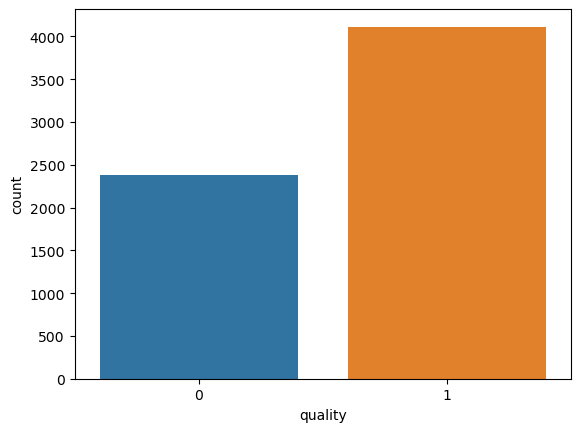

In [57]:
sns.countplot(data['quality'])

In [58]:
# dividing the dataset into dependent and independent variables
x = data.iloc[:,:8]
y = data.iloc[:,8:9]
# determining the shape of x and y.
print(x.shape)
print(y.shape)

(6497, 8)
(6497, 1)


In [59]:
# dividing the dataset in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4872, 8)
(4872, 1)
(1625, 8)
(1625, 1)


In [60]:
# standard scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


**Modelling**

**Logistic Regression**

In [61]:
# creating the model
model = LogisticRegression()
# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))


C:\Users\eisha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.7066912972085386
Testing accuracy : 0.6904615384615385
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       584
           1       0.74      0.80      0.77      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.65      1625
weighted avg       0.68      0.69      0.69      1625

[[294 290]
 [213 828]]


**Stochastic Gradient Descent Classifier**

In [62]:
# creating the model
model = SGDClassifier(penalty=None)

# feeding the training model into the model
model.fit(x_train, y_train)

# predicting the values for the test set
y_pred = model.predict(x_test)

# classification report
print(classification_report(y_test, y_pred))

C:\Users\eisha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.54      0.62      0.58       584
           1       0.77      0.70      0.73      1041

    accuracy                           0.67      1625
   macro avg       0.65      0.66      0.65      1625
weighted avg       0.69      0.67      0.68      1625



**Support Vector Machine**

In [63]:
# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))


C:\Users\eisha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.7676518883415435
Testing accuracy : 0.7304615384615385


In [64]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [65]:
#grid_svc.fit(x_train, y_train)

In [66]:
#grid_svc.best_params_

In [67]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

C:\Users\eisha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.65      0.54      0.59       584
           1       0.76      0.84      0.80      1041

    accuracy                           0.73      1625
   macro avg       0.71      0.69      0.69      1625
weighted avg       0.72      0.73      0.72      1625



**Decision Forest**

In [68]:
# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7181538461538461


In [69]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.65      0.62       584
           1       0.79      0.76      0.77      1041

    accuracy                           0.72      1625
   macro avg       0.70      0.70      0.70      1625
weighted avg       0.72      0.72      0.72      1625

[[379 205]
 [253 788]]


In [70]:
#Now lets try to do some evaluation for decision tree model using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()


0.7458949069242939

**Random Forest**

In [71]:
# creating the model
rfmodel = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
rfmodel.fit(x_train, y_train)

# predicting the results for the test set
y_pred = rfmodel.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", rfmodel.score(x_train, y_train))
print("Testing accuracy :", rfmodel.score(x_test, y_test))

C:\Users\eisha\AppData\Local\Temp\ipykernel_7104\492824930.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(x_train, y_train)


Training accuracy : 1.0
Testing accuracy : 0.8153846153846154


In [72]:
# Random Forest classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.69      0.73       584\n           1       0.84      0.89      0.86      1041\n\n    accuracy                           0.82      1625\n   macro avg       0.80      0.79      0.79      1625\nweighted avg       0.81      0.82      0.81      1625\n'

In [73]:
# Random Forest confusion matrix
confusion_matrix(y_test, y_pred)

array([[403, 181],
       [119, 922]], dtype=int64)

In [74]:
#Random Forest Cross validation score
model_eval = cross_val_score(estimator = rfmodel, X = x_train, y = y_train, cv = 5)
model_eval.mean()

C:\Users\eisha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eisha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eisha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\eisha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

0.7994646448691622

In [75]:
def logisticRegression(x_train, x_test, y_train, y_test):
    # creating the model
    model = LogisticRegression()
    # feeding the training set into the model
    model.fit(x_train, y_train)
    # predicting the results for the test set
    y_pred = model.predict(x_test)
    # calculating the training and testing accuracies
    print('***logisticRegression***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    # classification report
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print(confusion_matrix(y_test, y_pred))

In [76]:
def SGD(x_train, x_test, y_train, y_test):
    # creating the model
    model = SGDClassifier(penalty=None)
    # feeding the training model into the model
    model.fit(x_train, y_train)
    # predicting the values for the test set
    y_pred = model.predict(x_test)
    print('***Stochastic Gradient Descent Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    # classification report
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print(confusion_matrix(y_test, y_pred))
    

In [77]:
def SVClassifier(x_train, x_test, y_train, y_test):
    # creating the model
    model = SVC()
    # feeding the training set into the model
    model.fit(x_train, y_train)
    # predicting the results for the test set
    y_pred = model.predict(x_test)
    # calculating the training and testing accuracies
    print('***Support Vector Classifier***')
    print("Training accuracy :", model.score(x_train, y_train))
    print("Testing accuracy :", model.score(x_test, y_test))
    # classification report
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print(confusion_matrix(y_test, y_pred))

In [78]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print("Training accuracy :", dt.score(x_train, y_train))
    print("Testing accuracy :", dt.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [79]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print("Training accuracy :", rf.score(x_train, y_train))
    print("Testing accuracy :", rf.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [80]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print("Training accuracy :", xg.score(x_train, y_train))
    print("Testing accuracy :", xg.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [81]:
def compareModel(x_train, x_test, y_train, y_test):
    logisticRegression(x_train, x_test, y_train, y_test)
    print('-'*100)
    SGD(x_train, x_test, y_train, y_test)
    print('-'*100)
    SVClassifier(x_train, x_test, y_train, y_test)
    print('-'*100)
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)
    print('-'*100)

In [82]:
compareModel(x_train, x_test, y_train, y_test)

C:\Users\eisha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eisha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eisha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***logisticRegression***
Training accuracy : 0.7066912972085386
Testing accuracy : 0.6904615384615385
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       584
           1       0.74      0.80      0.77      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.65      1625
weighted avg       0.68      0.69      0.69      1625

[[294 290]
 [213 828]]
----------------------------------------------------------------------------------------------------
***Stochastic Gradient Descent Classifier***
Training accuracy : 0.7040229885057471
Testing accuracy : 0.6873846153846154
              precision    recall  f1-score   support

           0       0.57      0.52      0.54       584
           1       0.74      0.78      0.76      1041

    accuracy                           0.69      1625
   macro avg       0.66      0.65      0.65      1625
weighted avg       0.68      0.69      0.68      1625

C:\Users\eisha\AppData\Local\Temp\ipykernel_7104\1264059584.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


***RandomForestClassifier***
Training accuracy : 0.9997947454844006
Testing accuracy : 0.8098461538461539
Confusion matrix
[[403 181]
 [128 913]]
Classification report
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       584
           1       0.83      0.88      0.86      1041

    accuracy                           0.81      1625
   macro avg       0.80      0.78      0.79      1625
weighted avg       0.81      0.81      0.81      1625

----------------------------------------------------------------------------------------------------


C:\Users\eisha\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***GradientBoostingClassifier***
Training accuracy : 0.791871921182266
Testing accuracy : 0.7390769230769231
Confusion matrix
[[347 237]
 [187 854]]
Classification report
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       584
           1       0.78      0.82      0.80      1041

    accuracy                           0.74      1625
   macro avg       0.72      0.71      0.71      1625
weighted avg       0.73      0.74      0.74      1625

----------------------------------------------------------------------------------------------------


In [83]:
pickle.dump(rfmodel,open('wineQuality_new.pkl','wb'))